[MIT's Introduction to Deep Learning](https://www.youtube.com/watch?v=7sB052Pz0sQ)

# Intro to Regression with NN

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.2


## Creating Data to View and Fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

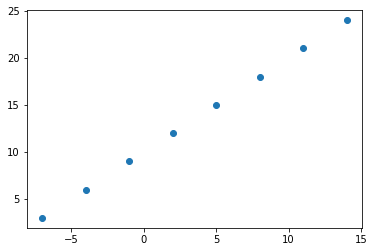

In [4]:
# Creating the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [6]:
# Creating a demo tensor for the housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
# Back to the first problem
# Only one value is needed to predict the output
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn NumPy arrays into Tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modelling with Tensorflow

1. **Creating a Model**: define the input and output layers, as well as the hidden layers.
2. **Compiling the Model**: define the **loss function** (function which tells the model how wrong it is), the **optimizer** (tells the model how to improve the patterns it's learning) and the **evaluation metrics** (what can be used to interpret the performance of the model).
3. **Fitting the Model**: letting the model try to find patterns between X & y.

In [10]:
tf.expand_dims(X, axis=1).shape, tf.expand_dims(X, axis=1).ndim

(TensorShape([8, 1]), 2)

In [11]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try to make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 195ms/step


array([[12.716021]], dtype=float32)

In [14]:
y_pred + 11 # 11 = mae

array([[23.71602]], dtype=float32)

## Improving the Model

- Common ways to improve a model:
    - Adding layers
    - Increase the number of hidden units
    - Change the activation functions
    - Change the optimization function
    - Change the learning rate
    - Fitting on more data
    - Fitting for longer

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Training it for longer
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 614ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[29.739855]], dtype=float32)

In [25]:
# Improving one more time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 924ms/step - loss: 13.0082 - mae: 13.0082
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4439 - mae: 12.4439
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8780 - mae: 11.8780
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3114 - mae: 11.3114
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7415 - mae: 10.7415
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1534 - mae: 10.1534
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5389 - mae: 9.5389
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8934 - mae: 8.8934
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2104 - mae: 8.2104
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4880 - mae: 7.4880
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[31.30163]], dtype=float32)

- Even though this model did better (mae of about 3.7), the prediction was far worse than the last model (mae of about 6.9).
This means that the model might be **overfitting**

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 836ms/step - loss: 14.2994 - mae: 14.2994
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.6242 - mae: 13.6242
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 12.9557 - mae: 12.9557
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.2925 - mae: 12.2925
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 11.6325 - mae: 11.6325
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 10.9737 - mae: 10.9737
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 10.3136 - mae: 10.3136
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6491 - mae: 9.6491
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 8.9770 - mae: 8.9770
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2940 - mae: 8.2940
Epoch 11/100
1/1 [==============================] - 0s 11ms/step -

In [31]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[27.301908]], dtype=float32)

## Evaluating the Model

In [32]:
# Making a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [33]:
# Making labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [34]:
# Visualize the data
import matplotlib.pyplot as plt

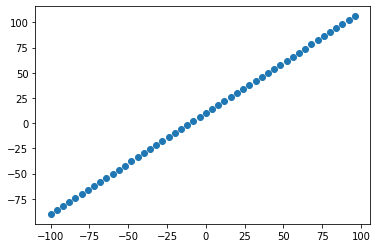

In [35]:
plt.scatter(X, y)

### The 3 Sets

- The Training Set: model learns from this data
- The Validation Set: model gets tuned on this data
- The Testing Set: model gets evaluated on this data

In [36]:
# Checking the length of samples
len(X)

50

In [37]:
# Splitting the data into train and test sets
X_train = X[:40] # First 40 samples (80%)
y_train = y[:40]

X_test = X[40:] # Last 10 samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the Data

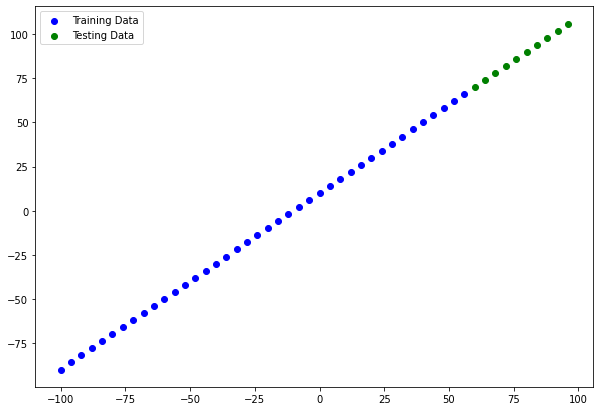

In [41]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.legend()

### Bulding a Neural Network

- Creating a model which builds automatically by defining the input_shape argument

In [62]:
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_x')

# Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [63]:
model.summary()

Model: "model_x"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- Total parameters: Total number of parameters in the model
- Trainable parameters: Parameters (patterns) the model can update as it trains
- Non-training parameters: Parameters that aren't updated during training (like when bringing in already learned patterns from other model during **transfer learning**)

In [64]:
# Fitting the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms/

In [65]:
from tensorflow.keras.utils import plot_model

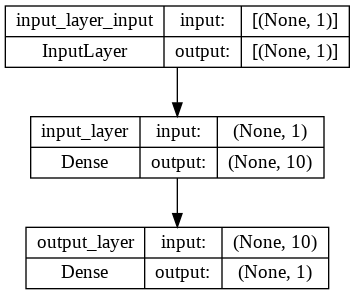

In [66]:
plot_model(model=model, show_shapes=True)

### Visualizing the Model's Predictions

In [67]:
# Making some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [69]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, 
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

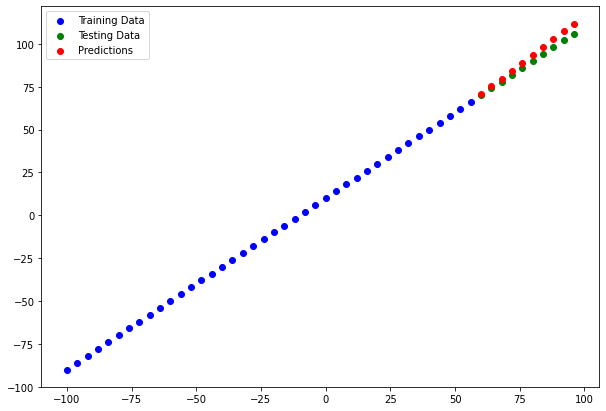

In [70]:
plot_predictions()

### Evaluating the Model's Predictions with Regression Evaluation Metrics

In [71]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 169ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [78]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [75]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [77]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [76]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [79]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [80]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [90]:
# Making some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

## Running Experiments to Improve the Model

- Get more data
- Make the model larger
- Train for longer

Three Modelling Experiments:

1. `model_1`: same as the orginal model, 1 layer, trained for 100 epochs.
2. `model_2`: 2 layers, trained for 100 epochs.
3. `model_3`: 2 layers, trained for 500 epochs.

### Building model_1

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD())

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 8.3980
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6639
Epoch 13/100
2/2 [==============================] - 0s

1/1 [==============================] - 0s 55ms/step


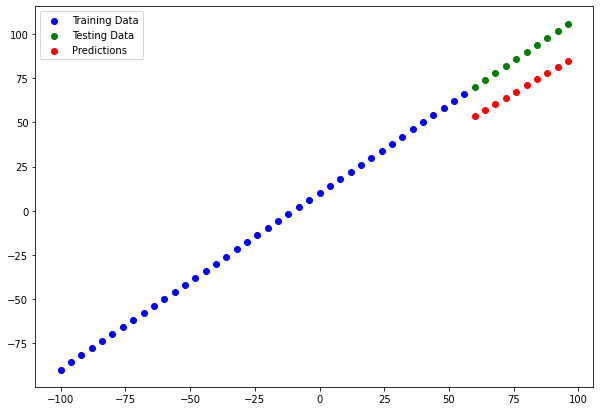

In [85]:
# Making and plotting predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [87]:
y_preds_1.shape

(10, 1)

In [91]:
# Calculating model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Building model_2

In [95]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 52ms/step


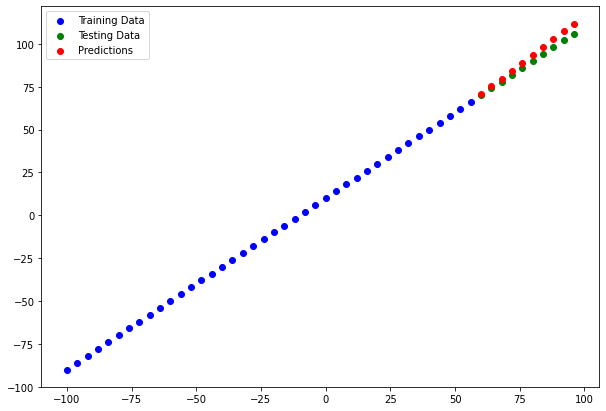

In [96]:
# Making and plotting predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [97]:
# Calculating the evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

### Building model_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

1/1 [==============================] - 0s 46ms/step


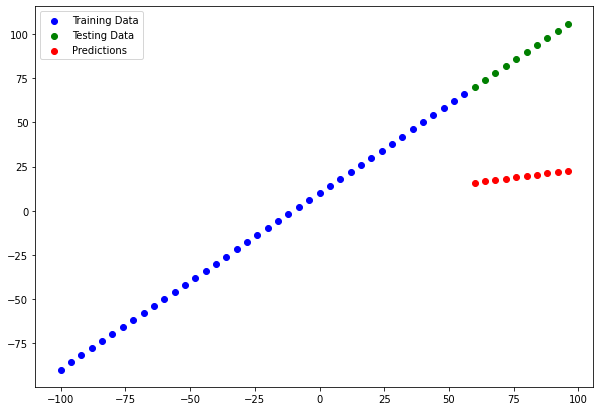

In [100]:
# Making and plotting predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [101]:
# Calculating model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the Results of the Experiments

In [102]:
# Comparing the results using a DataFrame
import pandas as pd

In [104]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


## Tracking Experiments

- TensorBoard
- Weights & Biases

## Saving Models

In [105]:
# Saving Model using the SavedModel format
model_2.save('/content/model_SavedModel_format')

In [106]:
# Saving Model using the HDF5 format
model.save('/content/model_HDF5_format.h5')

## Loading Models

In [107]:
# Load the SavedModel format model
loaded_SavedModel_format_model = tf.keras.models.load_model('/content/model_SavedModel_format')
loaded_SavedModel_format_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Comparing model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_model_preds = loaded_SavedModel_format_model.predict(X_test)
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, 
                                                y_pred=loaded_SavedModel_format_model_preds)

1/1 [==============================] - 0s 84ms/step


<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [109]:
model_2_preds == loaded_SavedModel_format_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [110]:
# Load the model using the .h5 format
loaded_h5_format_model = tf.keras.models.load_model(
    '/content/model_HDF5_format.h5'
)

In [111]:
loaded_h5_format_model.summary()

Model: "model_x"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [112]:
loaded_h5_format_model_preds = loaded_h5_format_model.predict(X_test)
model_2_preds == loaded_h5_format_model_preds

1/1 [==============================] - 0s 94ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# The Real Deal - Medical Dataset

In [119]:
# Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [114]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [115]:
# One-hot econding the dataframe
insurance_one_hot = pd.get_dummies(insurance, drop_first=True)
insurance_one_hot.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [116]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [117]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [118]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [120]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [121]:
# Build a Neural Network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8622.7656 - mae: 8622.7656
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7888.7065 - mae: 7888.7065
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7609.7412 - mae: 7609.7412
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7788.2974 - mae: 7788.2974
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7665.2529 - mae: 7665.2529
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7662.0391 - mae: 7662.0391
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7577.1016 - mae: 7577.1016
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7825.6167 - mae: 7825.6167
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7464.4756 - mae: 7464.4756
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7727.0820 - mae: 7727.0820

In [122]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7999.9692 - mae: 7999.9692


[7999.96923828125, 7999.96923828125]

## Improving the Model

In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mae: 13106.1074
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12074.5029 - mae: 12074.5029
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10943.2773 - mae: 10943.2773
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9497.8984 - mae: 9497.8984
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8163.3486 - mae: 8163.3486
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.0991 - mae: 7514.0991
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7387.0762 - mae:

In [125]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6003.9653 - mae: 6003.9653


[6003.96533203125, 6003.96533203125]

In [128]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13106.1074 - mae: 13106.1074
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12074.5029 - mae: 12074.5029
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 10943.2773 - mae: 10943.2773
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9497.8984 - mae: 9497.8984
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8163.3486 - mae: 8163.3486
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7514.0991 - mae: 7514.0991
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7387.0762 - mae:

In [129]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 3443.2954 - mae: 3443.2954


[3443.29541015625, 3443.29541015625]

Text(0.5, 0, 'Epochs')

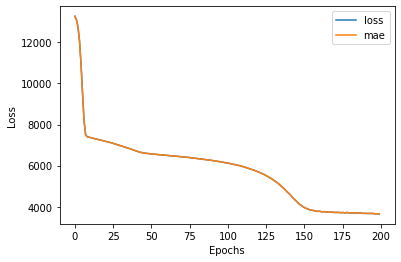

In [130]:
# Plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

## Preprocessing Data (Normalization and Standardization)

In [131]:
X.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


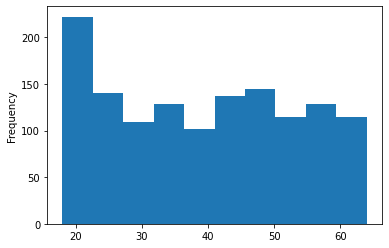

In [132]:
X['age'].plot(kind='hist')

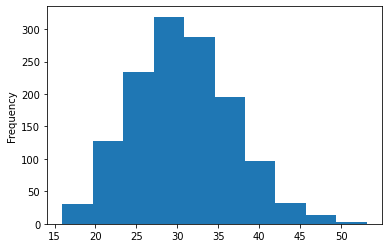

In [133]:
X['bmi'].plot(kind='hist')

In [134]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [139]:
# Create a column transformer
ct = make_column_transformer(
    # Turn all values in these columns between 0 and 1
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [141]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [142]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [143]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Build a Neural Network to Fit on the Normalized Data

In [144]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 11925.96

In [145]:
# Evaluate the insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]